In [195]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import e
from numpy import cos
from numpy import sin
from numpy import sqrt

t_us = [ 1.43356e-005, 1.48409e-005, 1.48591e-005, 1.48371e-005, 1.38429e-005, 1.67349e-005, 1.63128e-005, 1.74973e-005, 1.70978e-005, 1.7093e-005, 1.88e-005, 1.81173e-005, 1.80496e-005, 1.97685e-005, 1.92137e-005, 2.07395e-005, 1.92795e-005, 2.01916e-005, 2.19546e-005, 2.28908e-005, 2.35669e-005, 2.41654e-005, 2.49204e-005, 2.76655e-005, 2.67068e-005, 2.61824e-005, 2.52822e-005, 2.93185e-005, 3.10825e-005, 3.38155e-005, 3.51766e-005, 3.70848e-005, 3.82072e-005, 3.9352e-005, 4.02661e-005, 4.11691e-005, 4.17887e-005, 4.30048e-005, 4.41271e-005, 4.4996e-005, 4.74696e-005, 4.6101e-005, 4.67559e-005, 4.90404e-005, 5.01497e-005, 5.10046e-005, 5.20495e-005, 5.33921e-005, 5.41879e-005, 5.49063e-005, 5.61765e-005, 5.7772e-005, 6.08875e-005, 6.53214e-005, 6.93605e-005, 7.27573e-005, 7.39783e-005, 7.5809e-005, 7.74709e-005, 7.90956e-005, 8.22175e-005, 8.06749e-005, 8.41629e-005, 8.63281e-005, 8.84912e-005, 9.06602e-005, 9.27885e-005, 9.51076e-005, 9.94616e-005, 0.000103795, 0.000107245, 0.000111272, 0.000115609, 0.000119953, 0.000124298, 0.000128657, 0.000133016, 0.000137387, 0.000141748, 0.000146116, 0.000150473, 0.000154791, 0.000159189, 0.000163545, 0.000167903, 0.000172656, 0.000177014, 0.000181372, 0.00018573, 0.000190088, 0.000194443, 0.000198802, 0.000203158, 0.000207517, 0.000211993, 0.000216231, 0.000220589, 0.000224866, 0.000229304, 0.000233661, 0.000238018, 0.000242376, 0.000246734, 0.000250159] 
V_V = [ -1.85819, -1.46543, -1.62303, -1.72353, -1.98167, -1.02757, -1.21153, -0.637609, -0.757752, -0.865123, -0.20209, -0.315236, -0.401798, 0.115304, -0.0108282, 0.481968, -0.0955098, 0.310928, 0.736094, 0.875153, 1.08109, 1.19915, 1.37667, 1.79133, 1.67697, 1.56721, 1.50163, 1.87448, 1.948, 1.94468, 1.84477, 1.73526, 1.6026, 1.51073, 1.41327, 1.30156, 1.18932, 1.08009, 0.947371, 0.813201, 0.493835, 0.697466, 0.594262, 0.363731, 0.23046, 0.146644, 0.0280474, -0.0735868, -0.146997, -0.199818, -0.276139, -0.363412, -0.457239, -0.48604, -0.437249, -0.348669, -0.298645, -0.245524, -0.196792, -0.158545, -0.0542386, -0.101915, -0.00439942, 0.0353309, 0.0748923, 0.0873901, 0.114635, 0.117994, 0.113541, 0.0829524, 0.0483579, 0.0200052, -0.00662468, -0.0239546, -0.0392916, -0.0378683, -0.0355252, -0.0188745, -0.0133122, -0.000834481, -0.00118599, -0.00083344, -5.1595e-006, -0.000881278, -0.000326634, -0.00118485, -0.000379819, -0.000126657, 0.000479086, 0.00139142, -0.00191699, -0.00018197, -0.00123693, 0.000390783, 0.000151956, -0.000467228, -9.14285e-005, -0.00136459, 0.000302479, -0.00057364, -0.00144976, -0.000537423, -8.49758e-005, -0.0103199] 
σ_V = np.array([sqrt((0.0566*0.5)**2 + (0.0212*v)**2) for v in V_V])


def fitfunc(x,Ca,R):
    V0=7.202648406699006
    #R=75.15119414457453
    c=1.4624652271360089E-06
    #Ca=1.0038462242324967e-07
    L=0.0009443939161336839
    return -((e**((R*(-c - x))/(2.*L))*V0*(sqrt(-1 + (4*L)/(Ca*R**2))*cos((sqrt(-1 + (4*L)/(Ca*R**2))*R*(c + x))/(2.*L)) + 
            sin((sqrt(-1 + (4*L)/(Ca*R**2))*R*(c + x))/(2.*L))))/sqrt(-1 + (4*L)/(Ca*R**2)))

In [196]:
def chisquared(Ca,R):
    chisq=0
    for i in range (0,len(t_us)):
        chisq+=((V_V[i]-fitfunc(t_us[i],Ca,R))/σ_V[i])**2
    return chisq

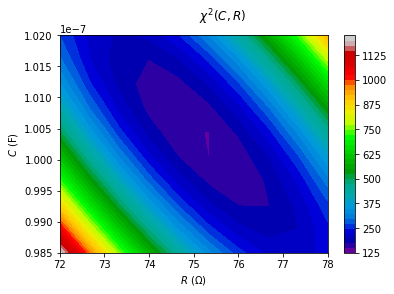

In [199]:
fig=plt.figure()
y=np.linspace(98.5E-9,102E-9,10)
#y=np.linspace(0.92E-3,0.97E-3,10)
x=np.linspace(72,78,10)
z = np.array([chisquared(j,i) for j in y for i in x])
X, Y = np.meshgrid(x, y)
Z = z.reshape(10, 10)
plt.contourf(X, Y, Z,50,vmin=0,vmax=1200,cmap='nipy_spectral')
fig.suptitle(' $\chi ^2 (C,R)$ ')
#plt.ylabel('$L$ (H)')
plt.xlabel('$R$ ($\Omega$)')
plt.ylabel('$C$ (F)')
plt.colorbar()
#fig.savefig('chisqLRrlr.pdf')